# Exercice 2 : Essais en stéganographie

### Q1

(300, 451, 3)
uint8
0 231
(191, 384)
uint8
0 255


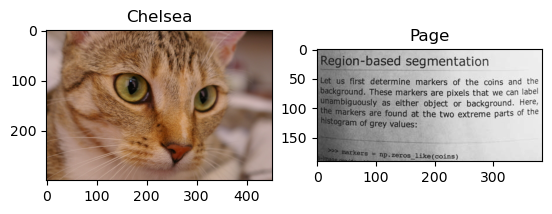

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data

Ivis = data.chelsea()
Isecret = data.page()
print(Ivis.shape)
print(Ivis.dtype)
print(Ivis.min(), Ivis.max())
print(Isecret.shape)
print(Isecret.dtype)
print(Isecret.min(), Isecret.max())
fig, axes = plt.subplots(1, 2)
axes[0].imshow(Ivis)
axes[0].set_title("Chelsea")
axes[1].imshow(Isecret, cmap='gray')
axes[1].set_title("Page")
plt.show()

### Q2

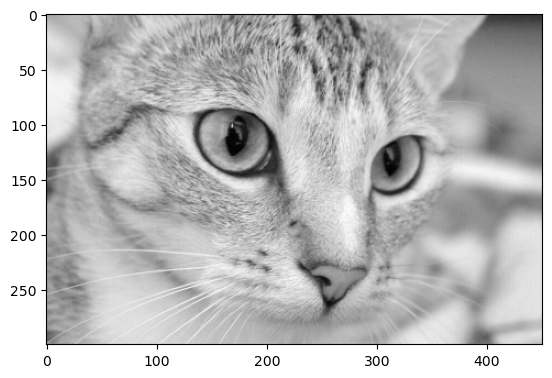

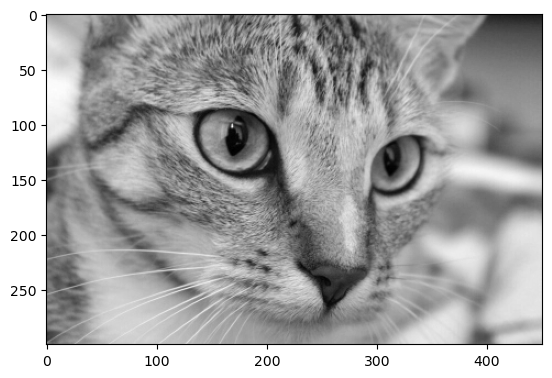

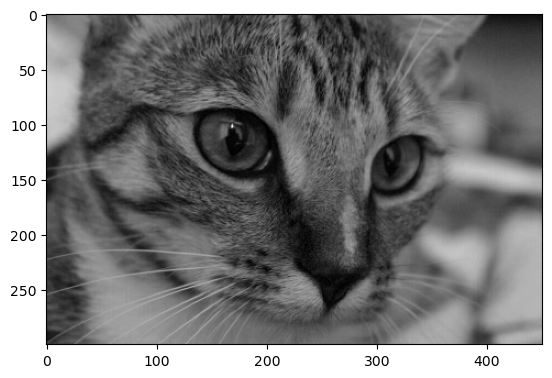

In [3]:
plt.imshow(Ivis[:,:,0], cmap='gray')
plt.show()

plt.imshow(Ivis[:,:,1], cmap='gray')
plt.show()

plt.imshow(Ivis[:,:,2], cmap='gray')
plt.show()

### Q3

L'intensité semble plus élévée sur la composante rouge, cela peut se vérifier :

In [4]:
print(Ivis[:,:,0].mean())
print(Ivis[:,:,1].mean())
print(Ivis[:,:,2].mean())

147.67308943089432
111.44447893569844
86.79785661492978


### Q4 & Q5

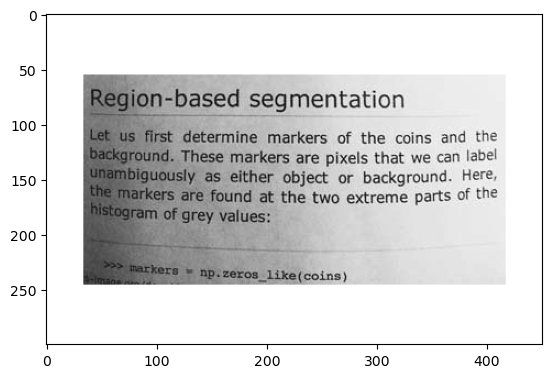

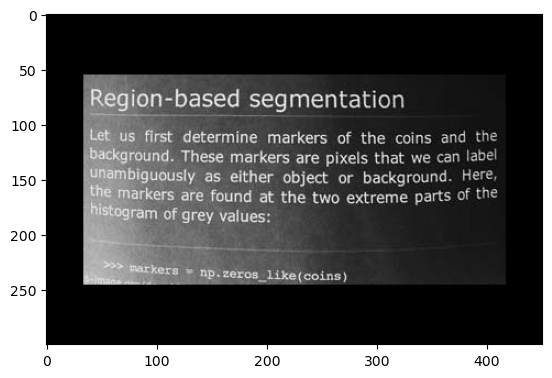

In [5]:
Isecret_bordure = np.full(Ivis[:,:,0].shape, 255)

bordure_v = (Ivis.shape[0] - Isecret.shape[0]) // 2
bordure_h = (Ivis.shape[1] - Isecret.shape[1]) // 2

Isecret_bordure[bordure_v+1:-bordure_v,bordure_h+1:-bordure_h] = Isecret

plt.imshow(Isecret_bordure, cmap='gray')
plt.show()

Isecret_bordure2 = 255 - Isecret_bordure

plt.imshow(Isecret_bordure2, cmap='gray')

### Q6 & Q7

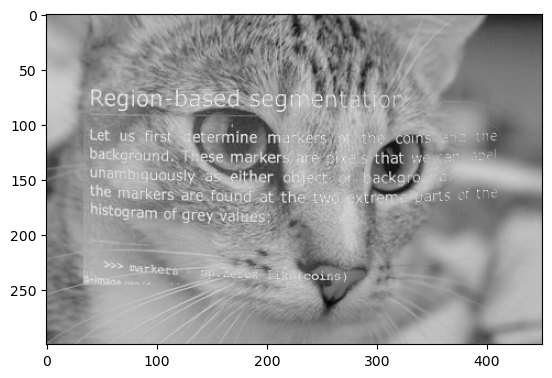

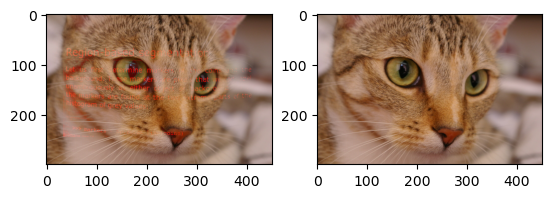

In [6]:
Ivis[:,:,0] = np.maximum(Ivis[:,:,0], Isecret_bordure2)
plt.imshow(Ivis[:,:,0], cmap='gray')
plt.show()

fig, ax = plt.subplots(1,2)
ax[0].imshow(Ivis)
ax[1].imshow(data.chelsea())

### Q8

0 208


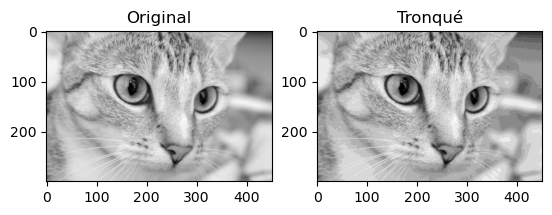

0 240


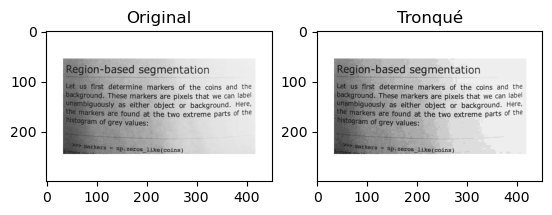

In [7]:
Ivis = data.chelsea()
IvisR = Ivis[:,:,0]

truncR = IvisR & int('11110000',2)
print(truncR.min(), truncR.max())
fig, ax = plt.subplots(1,2)
ax[0].imshow(IvisR, cmap='gray')
ax[0].set_title("Original")
ax[1].imshow(truncR, cmap='gray')
ax[1].set_title("Tronqué")
plt.show()

truncSecret = Isecret_bordure & int('11110000',2)
print(truncSecret.min(), truncSecret.max())

fig, ax = plt.subplots(1,2)
ax[0].imshow(Isecret_bordure, cmap='gray')
ax[0].set_title("Original")
ax[1].imshow(truncSecret, cmap='gray')
ax[1].set_title("Tronqué")
plt.show()

### Q9

1 223


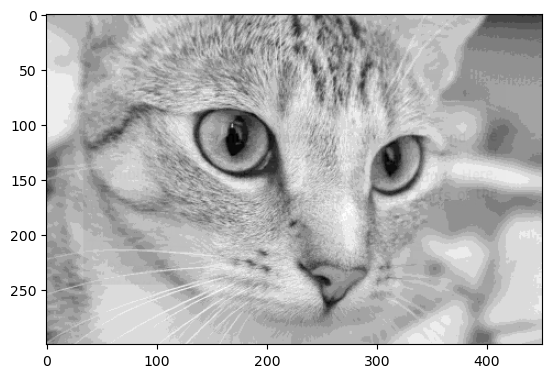

In [8]:
truncSecret = truncSecret >> 4
truncR = truncR | truncSecret

print(truncR.min(), truncR.max())

plt.imshow(truncR, cmap="gray")


### Q10

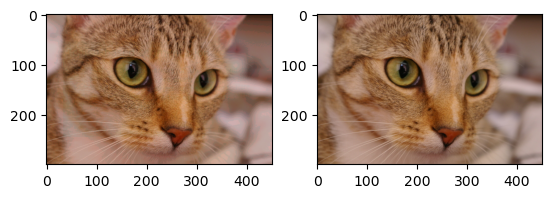

In [9]:
Ivis[:,:,0] = truncR

fig, ax = plt.subplots(1,2)
ax[0].imshow(Ivis)
ax[1].imshow(data.chelsea())

### Q11

In [10]:
print((np.abs(Ivis[:,:,0]-data.chelsea()[:,:,0])).sum())

6288947


### Q12

(array([[18., 31., 83., ..., 77., 19.,  0.],
        [16., 31., 84., ..., 78., 17.,  0.],
        [12., 39., 87., ..., 78., 13.,  0.],
        ...,
        [ 6., 13., 34., ..., 76.,  0.,  0.],
        [ 6., 14., 35., ..., 74.,  0.,  0.],
        [ 7., 11., 37., ..., 75.,  0.,  0.]]),
 array([  0. ,  23.1,  46.2,  69.3,  92.4, 115.5, 138.6, 161.7, 184.8,
        207.9, 231. ]),
 <a list of 451 BarContainer objects>)

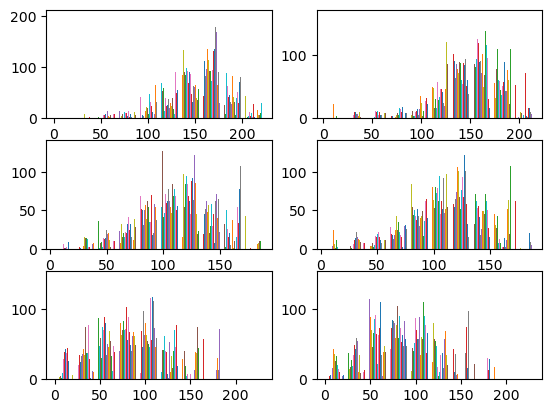

In [11]:
fig, ax = plt.subplots(3,2)
ax[0,0].hist(Ivis[:,:,0])
ax[0,1].hist(data.chelsea()[:,:,0])

ax[1,0].hist(Ivis[:,:,1])
ax[1,1].hist(data.chelsea()[:,:,1])

ax[2,0].hist(Ivis[:,:,2])
ax[2,1].hist(data.chelsea()[:,:,2])

### Q13

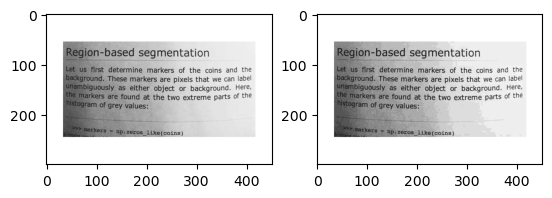

In [12]:
IvisR = Ivis[:,:,0]
IvisR = IvisR << 4

fig, ax = plt.subplots(1,2)
ax[0].imshow(Isecret_bordure, cmap='gray')
ax[1].imshow(IvisR, cmap='gray')
plt.show()

### Q14

6288947
6196486
6239542


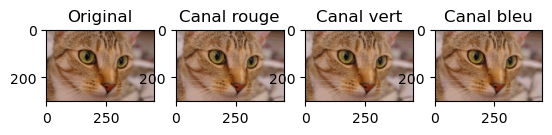

In [13]:
IvisRed, IvisGreen, IvisBlue, Ivis = 4 * [data.chelsea()]

trunc = {k:v|truncSecret for k, v in zip(['R', 'G', 'B'], [Ivis[:,:,i] & int('11110000',2) for i in range(3)])}

IvisRed[:,:,0] = trunc['R']
IvisGreen[:,:,1] = trunc['G']
IvisBlue[:,:,2] = trunc['B']

print((IvisRed[:,:,0]-data.chelsea()[:,:,0]).sum())
print((IvisGreen[:,:,1]-data.chelsea()[:,:,1]).sum())
print((IvisBlue[:,:,2]-data.chelsea()[:,:,2]).sum())

fig, ax = plt.subplots(1,4)
ax[0].imshow(data.chelsea())
ax[0].set_title("Original")
ax[1].imshow(IvisRed)
ax[1].set_title("Canal rouge")
ax[2].imshow(IvisGreen)
ax[2].set_title("Canal vert")
ax[3].imshow(IvisBlue)
ax[3].set_title("Canal bleu")
plt.show()



### Q15

(300, 451, 3)

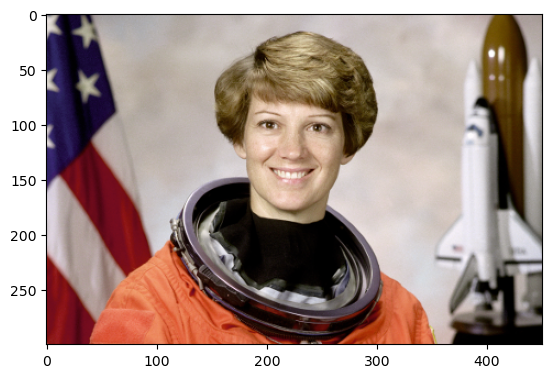

In [14]:
img_hide = data.astronaut()
img_hide = img_hide[:Ivis.shape[0],:Ivis.shape[1],:]
plt.imshow(img_hide)
img_hide.shape

13344887
16411255
17182149


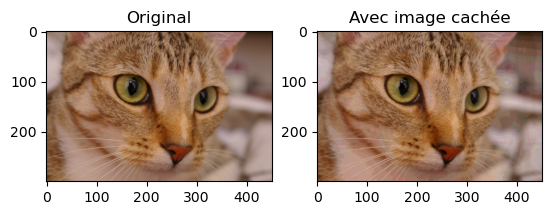

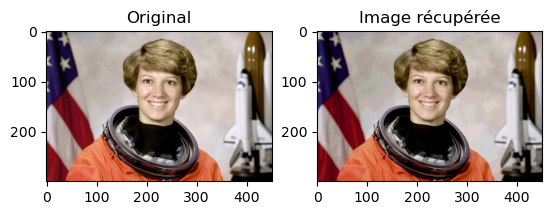

In [15]:

truncSecret = {k:(img_hide[:,:,v] & int('11110000',2)) >> 4 for k,v in zip(['R', 'G', 'B'], range(3))}
trunc = {k:v|truncSecret[k] for k, v in zip(['R', 'G', 'B'], [Ivis[:,:,i] & int('11110000',2) for i in range(3)])}

Ivis[:,:,0] = trunc['R']
Ivis[:,:,1] = trunc['G']
Ivis[:,:,2] = trunc['B']

print((Ivis[:,:,0]-data.chelsea()[:,:,0]).sum())
print((Ivis[:,:,1]-data.chelsea()[:,:,1]).sum())
print((Ivis[:,:,2]-data.chelsea()[:,:,2]).sum())

fig, ax = plt.subplots(1,2)
ax[0].imshow(data.chelsea())
ax[0].set_title("Original")
ax[1].imshow(Ivis)
ax[1].set_title("Avec image cachée")
plt.show()

ImageRecomp = Ivis
ImageRecomp[:,:,0], ImageRecomp[:,:,1], ImageRecomp[:,:,2] = [Ivis[:,:,i] << 4 for i in range(3)]

fig, ax = plt.subplots(1,2)
ax[0].imshow(img_hide)
ax[0].set_title("Original")
ax[1].imshow(ImageRecomp)
ax[1].set_title("Image récupérée")
plt.show()
